<a href="https://colab.research.google.com/github/AndreLuis0106/reconhecimento_genero_musical/blob/main/reconhecimento_genero_musical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autor: André Luís de Souza Oliveira

GitHub: https://github.com/AndreLuis0106

Esse projeto foi inspirado em: https://www.linkedin.com/pulse/reconhecimento-de-%C3%A1udio-para-classifica%C3%A7%C3%A3o-g%C3%AAneros-musicais-augusto/?originalSubdomain=pt

# **Reconhecimento de áudio para classificação de gêneros musicias com Python e Aprendizado de máquina**

Neste nootebook estudo a Recuperação de Informação Musical ou MIR (Music Information Retrieval), através do reconhecimeento de gêneros musicais 4 músicas. Onde é extraido as informações das músicas, principalmente o atributo MFCC que é chamado como MEl-Freuency Cepstral Coefficients que faz uma análise de características espectrais de tempo curto, baseando-se no uso de uma escala de frequências que imita as características únicas do som que são perceptíveis pelo ouvido humano. Para isso é usado a biblioteca Librosa.

In [ ]:
%matplotlib inline
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [ ]:
filename_rock = 'Avenged sevenfold - Blinded in Chains.mp3'
filename_hip = 'Baby Keem, Kendrick Lamar - family ties (Official Video).m4a'

#Pegando os 30 segundos inicias das músicas
x_rock, sr_rock = librosa.load(filename_rock, duration=30)
x_hiphop, sr_hiphop = librosa.load(filename_hip, duration=30)

<ipython-input-53-60dbbf642d62>:6: UserWarning: PySoundFile failed. Trying audioread instead.
  x_hiphop, sr_hiphop = librosa.load(filename_hip, duration=30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [ ]:
#Avenged sevenfold - Blinded in Chains
ipd.Audio(x_rock, rate = sr_rock)

In [ ]:
#Baby Keem, Kendrick Lamar - family ties
ipd.Audio(x_hiphop, rate = sr_hiphop)

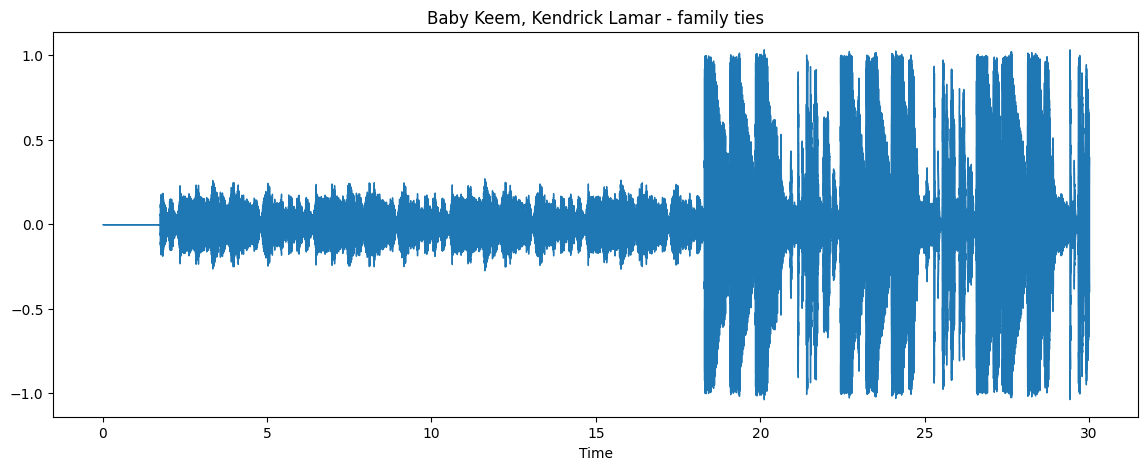

In [ ]:
#Onde do tempo de domínio dos sinais do áudio da música Baby Keem, Kendrick Lamar - family ties
plt.figure(figsize = (14, 5))
plt.title("Baby Keem, Kendrick Lamar - family ties")
librosa.display.waveshow(x_hiphop)

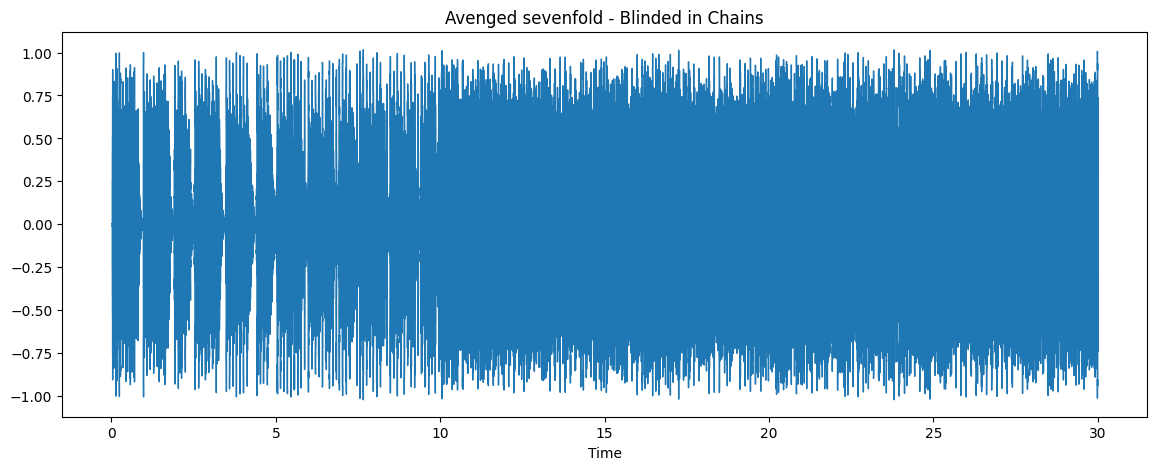

In [ ]:
#Onde do tempo de domínio dos sinais do áudio da música Avenged sevenfold - Blinded in Chains
plt.figure(figsize = (14, 5))
plt.title("Avenged sevenfold - Blinded in Chains")
librosa.display.waveshow(x_rock)

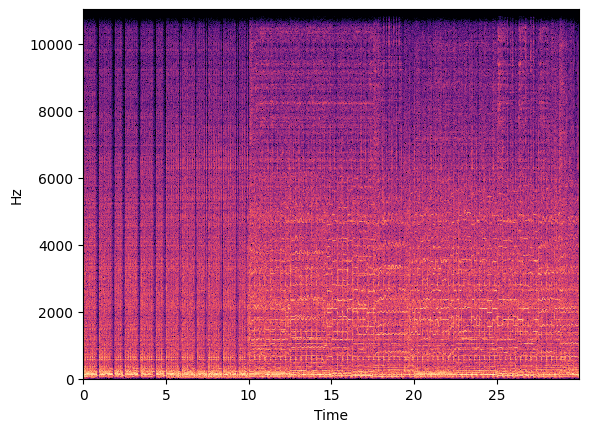

In [ ]:
#Espectograma dos 1ºs 30s da música Avenged sevenfold - Blinded in Chains
data = librosa.amplitude_to_db(np.abs(librosa.stft(x_rock)), ref=np.max)
librosa.display.specshow(data, y_axis='linear', x_axis='time', sr=sr_rock)

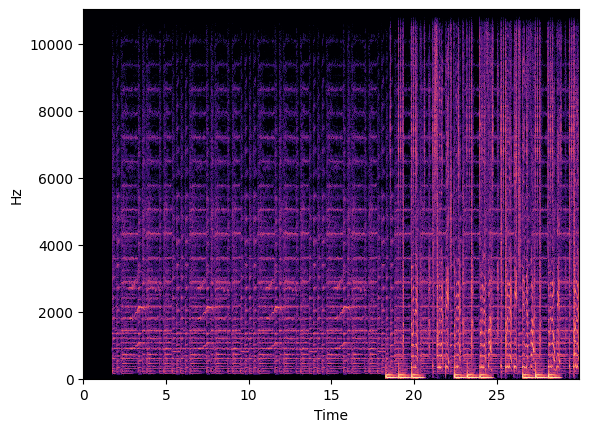

In [ ]:
#Espectograma dos 1ºs 30s da música Baby Keem, Kendrick Lamar - family ties
data = librosa.amplitude_to_db(np.abs(librosa.stft(x_hiphop)), ref=np.max)
librosa.display.specshow(data, y_axis='linear', x_axis='time', sr=sr_hiphop)

### Extraindo as features de cada música. Utilizando 12 coeficientes diferentes do mfcc e na sequência escalando os recursos.

In [ ]:
n_mfcc = 12
mfcc_rock = librosa.feature.mfcc(y = x_rock, sr = sr_rock, n_mfcc = n_mfcc)

In [ ]:
mfcc_hiphop = librosa.feature.mfcc(y = x_hiphop, sr=sr_hiphop, n_mfcc=n_mfcc)

In [ ]:
scaler = StandardScaler()

In [ ]:
mfcc_rock_scaled = scaler.fit_transform(mfcc_rock)
mfcc_hiphop_scaled = scaler.transform(mfcc_hiphop)

In [ ]:
mfcc_rock_scaled.mean(axis=0)
mfcc_hiphop_scaled.mean(axis=0)

array([-1.2756784 , -1.7259669 , -1.9644138 , ..., -1.0990777 ,
       -1.3204255 , -0.92157346], dtype=float32)

Para treinar o classificador, concatenando todos os vetores de features em uma tabela de features. Da mesma forma construindo um vetor de respostas (labels) em que 0 se refira ao primeiro arquivo de áudio de rock e 1 se refira ao segundo arquivo de áudio de hiphop.

In [ ]:
features = np.vstack((mfcc_rock_scaled, mfcc_hiphop_scaled))
labels = np.concatenate((np.zeros(len(mfcc_rock_scaled)), np.ones(len(mfcc_hiphop_scaled))))

In [ ]:
features

array([[-1.2609477 ,  1.1728604 ,  1.2632363 , ...,  0.0627098 ,
         0.6049665 ,  1.2469933 ],
       [ 2.9415262 ,  2.7007484 ,  2.5269458 , ...,  2.5571144 ,
         2.4949074 ,  2.2411559 ],
       [-0.7614365 , -1.0970931 , -1.2661299 , ..., -1.7132511 ,
        -1.7184888 , -1.5231041 ],
       ...,
       [-0.03664296, -0.41352725, -0.5996657 , ..., -0.8758099 ,
        -0.968246  , -0.6156255 ],
       [-0.03664296, -0.41352725, -0.5996657 , ..., -1.4033788 ,
        -1.3622186 , -0.70637745],
       [-0.03664296, -0.41352725, -0.5996657 , ..., -0.54737496,
        -0.8061252 , -0.51155967]], dtype=float32)

In [ ]:
labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

Usando o SVM do Scikit-Learn

In [ ]:
model = SVC()
model.fit(features, labels)

SVC()

Agora utilizarei 2 novos arquivos de áudio, um de rock e outro de hihop, para fazer a predição do gênero dessa músicas. As músicas escolhidas são Alright do Kendrick Lamar e

In [ ]:
rock_filetest = 'Foo Fighters - The Pretender.m4a'
hiphop_filetest = 'Alright.m4a'

x_rock_test, sr_rock = librosa.load(rock_filetest, duration = 30)
x_hiphop_test, sr_hihop = librosa.load(hiphop_filetest, duration = 30)

<ipython-input-117-6e15cfe53f48>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  x_rock_test, sr_rock = librosa.load(rock_filetest, duration = 30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
<ipython-input-117-6e15cfe53f48>:5: UserWarning: PySoundFile failed. Trying audioread instead.
  x_hiphop_test, sr_hihop = librosa.load(hiphop_filetest, duration = 30)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [ ]:
mfcc_rock_test = librosa.feature.mfcc(y = x_rock_test, sr=sr_rock, n_mfcc=n_mfcc)
mfcc_hiphop_test = librosa.feature.mfcc(y = x_hiphop_test, sr=sr_hiphop, n_mfcc=n_mfcc)

mfcc_rock_test_scaled = scaler.transform(mfcc_rock_test)
mfcc_hiphop_test_scaled = scaler.transform(mfcc_hiphop_test)

features_test = np.vstack((mfcc_rock_test_scaled, mfcc_hiphop_test_scaled))
labels_test = np.concatenate((np.zeros(len(mfcc_rock_test)),np.ones(len(mfcc_hiphop_test))))

Realizando a predição e verificando a acurácia do modelo

In [ ]:
predited_labels = model.predict(features_test)
score = model.score(features_test, labels_test)
score

0.5

In [ ]:
predited_labels

array([1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0.])

In [ ]:
labels_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

Vamos verificar a predição para que o modelo retorne uma única classe

Primeiro para a música The Pretender do Foo Fighters

In [ ]:
predicted_labels_rock = model.predict(mfcc_rock_test_scaled)

In [ ]:
unique_labels, unique_counts = np.unique(predicted_labels_rock, return_counts=True)

In [ ]:
unique_labels, unique_counts

(array([0., 1.]), array([8, 4]))

Como visto na saída acima, dos 12 coeficientes diferentes do mfcc analisados na música, o modelo classificou 8 como sendo do gênero Rock e 4 do Hip Hop

Segundo para a música Alright do Kendrick Lamar

In [ ]:
predicted_labels_hiphop = model.predict(mfcc_hiphop_test_scaled)

In [ ]:
unique_labels_2, unique_counts_2 = np.unique(predicted_labels_hiphop, return_counts=True)

In [ ]:
unique_labels_2, unique_counts_2

(array([0., 1.]), array([8, 4]))

A predição do modelo para a música teste de Hip Hop foi a mesma da do Rock. Isso demonstra que o modelo não foi treinado com dados suficientes para predizer músicas do gênero Hip Hop.